# Data Collection

In [1]:
import matplotlib.pyplot as plt

In [2]:
from IPython.display import Audio, display

Loading the data

In [3]:
import os
import urllib.request
import zipfile

data_folder = os.path.join(os.path.expanduser("~"), "Emo-DB")

if not os.path.exists(data_folder):
    url = "http://emodb.bilderbar.info/download/download.zip"
    zip_path = os.path.join(data_folder, "download.zip")
    os.makedirs(data_folder, exist_ok=True)
    print("Downloading Emo-DB (40.5 MB) ...")
    urllib.request.urlretrieve(url, zip_path)
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(data_folder)

Creating a mapping function

In [5]:
# Define the label mapping function
label_mapping = {
    'W': 0,
    'L': 1,
    'E': 2,
    'A': 3,
    'F': 4,
    'T': 5,
    'N': 6
}

file_labels = []

# Traverse the directory to find all WAV files
for root, dirs, files in os.walk(data_folder):
    for file in files:
        if file.endswith(".wav"):
            # Extract the 6th character from the file name
            label_char = file[5]
            # Map the character to the corresponding label
            if label_char in label_mapping:
                label = label_mapping[label_char]
                # Store the file path and label
                file_path = os.path.join(root, file)
                file_labels.append((file_path, label))

In [6]:
import pandas as pd

# create a dataframe
df = pd.DataFrame(file_labels, columns=['file_path', 'label'])
print(df.head())

                      file_path  label
0  /root/Emo-DB/wav/14a05Na.wav      6
1  /root/Emo-DB/wav/03a01Nc.wav      6
2  /root/Emo-DB/wav/16b09Wb.wav      0
3  /root/Emo-DB/wav/11b03Wa.wav      0
4  /root/Emo-DB/wav/13a07Wb.wav      0


In [7]:
print(df.tail())

                        file_path  label
530  /root/Emo-DB/wav/15a02Wb.wav      0
531  /root/Emo-DB/wav/16a07Ea.wav      2
532  /root/Emo-DB/wav/03b03Nb.wav      6
533  /root/Emo-DB/wav/14b10Ad.wav      3
534  /root/Emo-DB/wav/14a07Ld.wav      1


In [8]:
pip install librosa pandas

In [9]:
import librosa
import soundfile as sf
import numpy as np

Checking the datatypes inside each path file

In [10]:
type(df.iloc[2, 0])

str

# Extra - Plot function
this function:
* Loads two data from the dataframe
* Plots their respective waveplots and Spectograms
* Audio outputs from those two audios is shown



In [12]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio

def create_waveplot(df, idx1, idx2, n):
    file_path_1 = df.iloc[idx1]['file_path']
    label_1 = df.iloc[idx1]['label']
    file_path_2 = df.iloc[idx2]['file_path']
    label_2 = df.iloc[idx2]['label']

    y1, sr1 = librosa.load(file_path_1, sr=None)
    y2, sr2 = librosa.load(file_path_2, sr=None)

    print(f"The original file:\n File Path: {file_path_1} \n Label: {label_1} \n")
    print(f"Comparison file:\n File Path: {file_path_2} \n Label: {label_2} \n")
    print(f"The three most recent files:\n {df.tail(n)} \n")

    display(Audio(file_path_1))
    display(Audio(file_path_2))

    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot for audio index {idx1}', size=15)
    librosa.display.waveshow(y1, sr=sr1)
    plt.show()

    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot for audio index {idx2}', size=15)
    librosa.display.waveshow(y2, sr=sr2)
    plt.show()

    # Plot power spectrogram for the first audio file
    S1 = librosa.stft(y1)
    S1_db = librosa.amplitude_to_db(abs(S1))
    fig, ax = plt.subplots()
    img1 = librosa.display.specshow(S1_db, sr=sr1, x_axis='time', y_axis='log', ax=ax)
    ax.set_title('Power spectrogram for audio index {}'.format(idx1))
    fig.colorbar(img1, ax=ax, format="%+2.0f dB")
    plt.show()

    # Plot power spectrogram for the second audio file
    S2 = librosa.stft(y2)
    S2_db = librosa.amplitude_to_db(abs(S2))
    fig, ax = plt.subplots()
    img2 = librosa.display.specshow(S2_db, sr=sr2, x_axis='time', y_axis='log', ax=ax)
    ax.set_title('Power spectrogram for audio index {}'.format(idx2))
    fig.colorbar(img2, ax=ax, format="%+2.0f dB")
    plt.show()

# Data Augmentation
This processes are applyed subsequently in the following cells:
* Pitch shift
* Time stretch
* Noising audios
* Dynamic Range Copmression

**Pitch shift**

In [13]:
# Sampling rate (SR)
sr = 22050

shifted_data = []
# Apply pitch shifting
for index, row in df.iterrows():
    file_path = row['file_path']
    label = row['label']
    # Load the original audio file using soundfile.read
    y, original_sr = sf.read(file_path)
    # Resample if original_sr is different from sr
    if original_sr != sr:
        y = librosa.resample(y, orig_sr=original_sr, target_sr=sr)
    for i in range(3):
        # Random step between -3 and 3
        n_steps = np.random.uniform(-3, 3)
        # Perform pitch shift
        y_shifted = librosa.effects.pitch_shift(y, sr=sr, n_steps=n_steps, bins_per_octave=24)

        # Create a new file name for the pitch-shifted audio
        new_file_path = file_path.replace(".wav", f"_shifted_{i}.wav")
        # Save the pitch-shifted audio
        sf.write(new_file_path, y_shifted, sr)
        # Append the new file path and label to the augmented list
        shifted_data.append((new_file_path, label))

# Combining the original and augmented file labels
combined_file_labels = list(df.itertuples(index=False, name=None)) + shifted_data

# Creating a DataFrame from the combined file paths and labels
df_combined = pd.DataFrame(combined_file_labels, columns=['file_path', 'label'])
print(df_combined)

                                   file_path  label
0               /root/Emo-DB/wav/14a05Na.wav      6
1               /root/Emo-DB/wav/03a01Nc.wav      6
2               /root/Emo-DB/wav/16b09Wb.wav      0
3               /root/Emo-DB/wav/11b03Wa.wav      0
4               /root/Emo-DB/wav/13a07Wb.wav      0
...                                      ...    ...
2135  /root/Emo-DB/wav/14b10Ad_shifted_1.wav      3
2136  /root/Emo-DB/wav/14b10Ad_shifted_2.wav      3
2137  /root/Emo-DB/wav/14a07Ld_shifted_0.wav      1
2138  /root/Emo-DB/wav/14a07Ld_shifted_1.wav      1
2139  /root/Emo-DB/wav/14a07Ld_shifted_2.wav      1

[2140 rows x 2 columns]


The original file:
 File Path: /root/Emo-DB/wav/14a07Ld.wav 
 Label: 1 

Comparison file:
 File Path: /root/Emo-DB/wav/14a07Ld_shifted_1.wav 
 Label: 1 

The three most recent files:
                                    file_path  label
2137  /root/Emo-DB/wav/14a07Ld_shifted_0.wav      1
2138  /root/Emo-DB/wav/14a07Ld_shifted_1.wav      1
2139  /root/Emo-DB/wav/14a07Ld_shifted_2.wav      1 



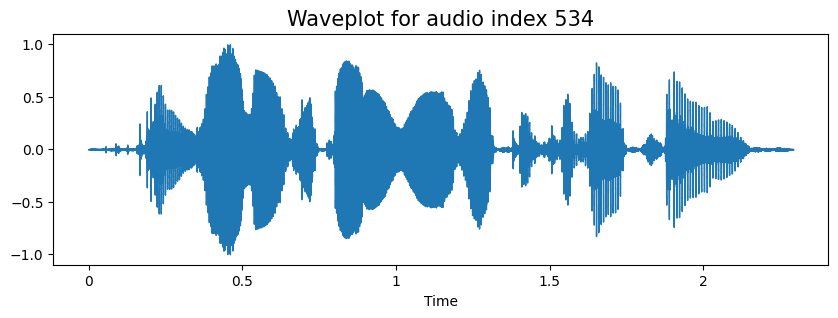

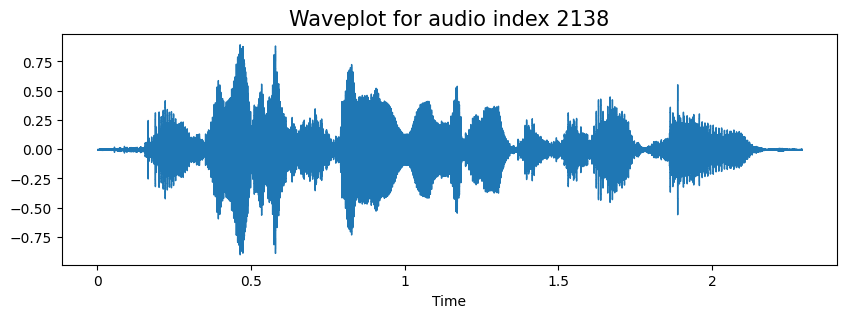

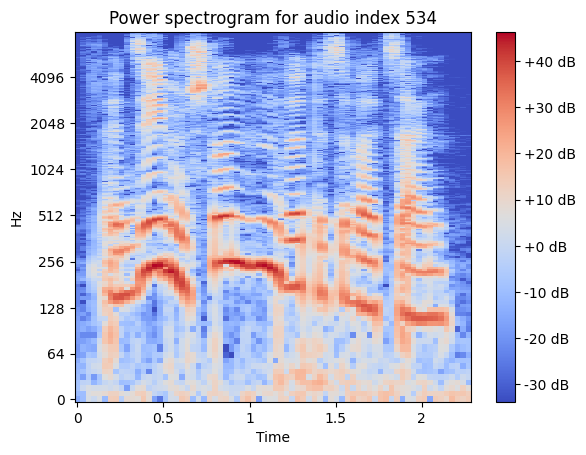

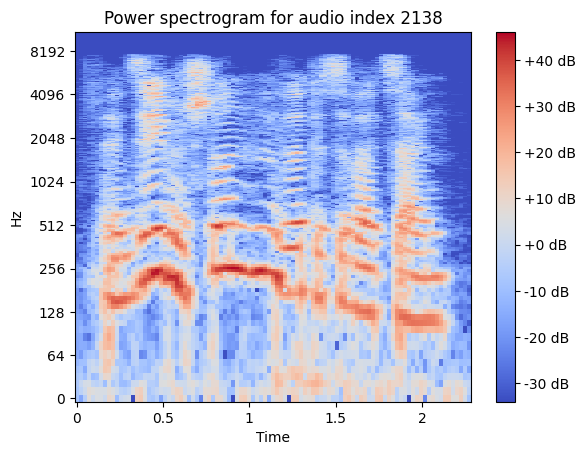

In [14]:
create_waveplot(df_combined, 534, 2138, 3)

**Time stretch**

In [16]:
sr = 22050

stretched_data = []
# Apply Stretching
for index, row in df.iterrows():
    file_path = row['file_path']
    label = row['label']
    # Load the original audio file using soundfile.read
    y, original_sr = sf.read(file_path)
    # Resample if original_sr is different from sr
    if original_sr != sr:
        y = librosa.resample(y, orig_sr=original_sr, target_sr=sr)
    for i in range(3):
        # Random rate between 0.8 and 1.2
        rate = np.random.uniform(0.8, 1.2)
        # Perform time stretch
        y_stretched = librosa.effects.time_stretch(y, rate=rate)

        # Create a new file name for the stretched audio
        new_file_path = file_path.replace(".wav", f"_stretched_{i}.wav")
        # Save the stretched audio
        sf.write(new_file_path, y_stretched, sr)
        # Append the new file path and label to the augmented list
        stretched_data.append((new_file_path, label))

# Combining the original and augmented file labels
combined_file_labels_2 = list(df_combined.itertuples(index=False, name=None)) + stretched_data

# Creating a DataFrame from the combined file paths and labels
df_combined_2 = pd.DataFrame(combined_file_labels_2, columns=['file_path', 'label'])
print(df_combined_2)

                                     file_path  label
0                 /root/Emo-DB/wav/14a05Na.wav      6
1                 /root/Emo-DB/wav/03a01Nc.wav      6
2                 /root/Emo-DB/wav/16b09Wb.wav      0
3                 /root/Emo-DB/wav/11b03Wa.wav      0
4                 /root/Emo-DB/wav/13a07Wb.wav      0
...                                        ...    ...
3740  /root/Emo-DB/wav/14b10Ad_stretched_1.wav      3
3741  /root/Emo-DB/wav/14b10Ad_stretched_2.wav      3
3742  /root/Emo-DB/wav/14a07Ld_stretched_0.wav      1
3743  /root/Emo-DB/wav/14a07Ld_stretched_1.wav      1
3744  /root/Emo-DB/wav/14a07Ld_stretched_2.wav      1

[3745 rows x 2 columns]


The original file:
 File Path: /root/Emo-DB/wav/14a07Ld.wav 
 Label: 1 

Comparison file:
 File Path: /root/Emo-DB/wav/14a07Ld_stretched_1.wav 
 Label: 1 

The three most recent files:
                                      file_path  label
3736  /root/Emo-DB/wav/03b03Nb_stretched_0.wav      6
3737  /root/Emo-DB/wav/03b03Nb_stretched_1.wav      6
3738  /root/Emo-DB/wav/03b03Nb_stretched_2.wav      6
3739  /root/Emo-DB/wav/14b10Ad_stretched_0.wav      3
3740  /root/Emo-DB/wav/14b10Ad_stretched_1.wav      3
3741  /root/Emo-DB/wav/14b10Ad_stretched_2.wav      3
3742  /root/Emo-DB/wav/14a07Ld_stretched_0.wav      1
3743  /root/Emo-DB/wav/14a07Ld_stretched_1.wav      1
3744  /root/Emo-DB/wav/14a07Ld_stretched_2.wav      1 



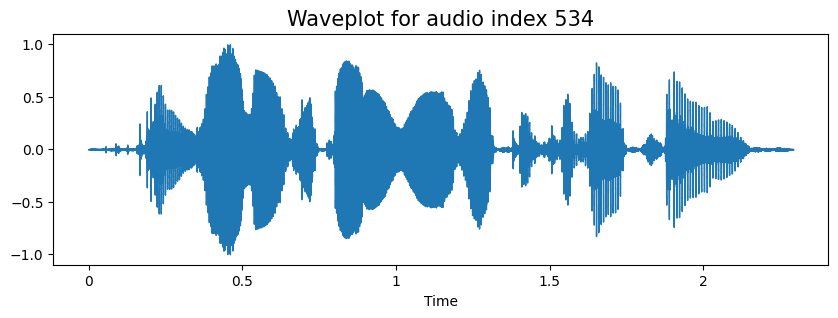

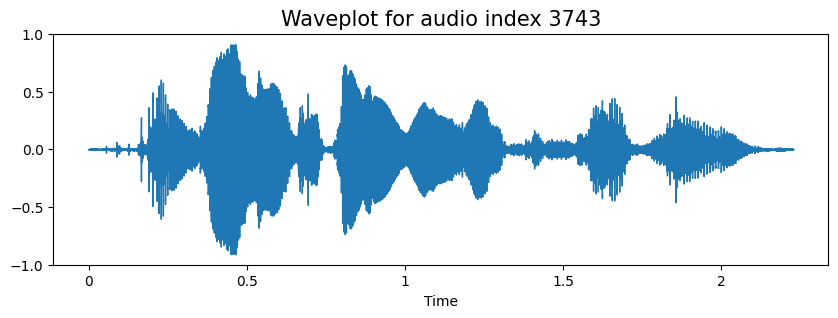

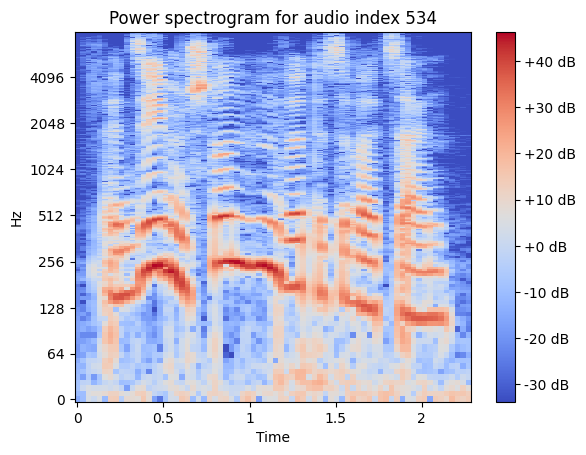

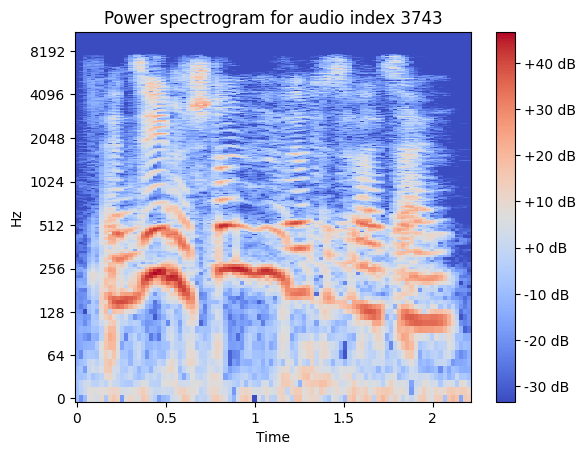

In [17]:
create_waveplot(df_combined_2, 534, 3743, 9)

**Noising audios**

In [18]:
# Function to add noise to an audio signal
def add_noise(data, noise_factor=0.005):
    noise = np.random.randn(len(data))
    augmented_data = data + noise_factor * noise
    augmented_data = augmented_data.astype(type(data[0]))
    return augmented_data

noise_data = []
# Apply noise augmentation
for index, row in df.iterrows():
    file_path = row['file_path']
    label = row['label']
    # Load the original audio file
    y, original_sr = sf.read(file_path)
    # Resample if original_sr is different from sr
    if original_sr != sr:
        y = librosa.resample(y, orig_sr=original_sr, target_sr=sr)

    # Add noise to the audio signal
    y_noisy = add_noise(y)

    # Create a new file name for the noise-augmented audio
    new_file_path = file_path.replace(".wav", f"_noisy_{i}.wav")
    # Save the noise-augmented audio
    sf.write(new_file_path, y_noisy, sr)
    # Append the new file path and label to the augmented list
    noise_data.append((new_file_path, label))

# Combining the original and augmented file labels
combined_file_labels = list(df_combined_2.itertuples(index=False, name=None)) + noise_data

# Creating a DataFrame from the combined file paths and labels
df_combined_3 = pd.DataFrame(combined_file_labels, columns=['file_path', 'label'])
print(df_combined_3)


                                 file_path  label
0             /root/Emo-DB/wav/14a05Na.wav      6
1             /root/Emo-DB/wav/03a01Nc.wav      6
2             /root/Emo-DB/wav/16b09Wb.wav      0
3             /root/Emo-DB/wav/11b03Wa.wav      0
4             /root/Emo-DB/wav/13a07Wb.wav      0
...                                    ...    ...
4275  /root/Emo-DB/wav/15a02Wb_noisy_2.wav      0
4276  /root/Emo-DB/wav/16a07Ea_noisy_2.wav      2
4277  /root/Emo-DB/wav/03b03Nb_noisy_2.wav      6
4278  /root/Emo-DB/wav/14b10Ad_noisy_2.wav      3
4279  /root/Emo-DB/wav/14a07Ld_noisy_2.wav      1

[4280 rows x 2 columns]


The original file:
 File Path: /root/Emo-DB/wav/14a07Ld.wav 
 Label: 1 

Comparison file:
 File Path: /root/Emo-DB/wav/14a07Ld_noisy_2.wav 
 Label: 1 

The three most recent files:
                                  file_path  label
4268  /root/Emo-DB/wav/16b01Aa_noisy_2.wav      3
4269  /root/Emo-DB/wav/08a07Ta_noisy_2.wav      5
4270  /root/Emo-DB/wav/12b10Ld_noisy_2.wav      1
4271  /root/Emo-DB/wav/15b09Ta_noisy_2.wav      5
4272  /root/Emo-DB/wav/11b10Ad_noisy_2.wav      3
4273  /root/Emo-DB/wav/09b09Nd_noisy_2.wav      6
4274  /root/Emo-DB/wav/15b10Lc_noisy_2.wav      1
4275  /root/Emo-DB/wav/15a02Wb_noisy_2.wav      0
4276  /root/Emo-DB/wav/16a07Ea_noisy_2.wav      2
4277  /root/Emo-DB/wav/03b03Nb_noisy_2.wav      6
4278  /root/Emo-DB/wav/14b10Ad_noisy_2.wav      3
4279  /root/Emo-DB/wav/14a07Ld_noisy_2.wav      1 



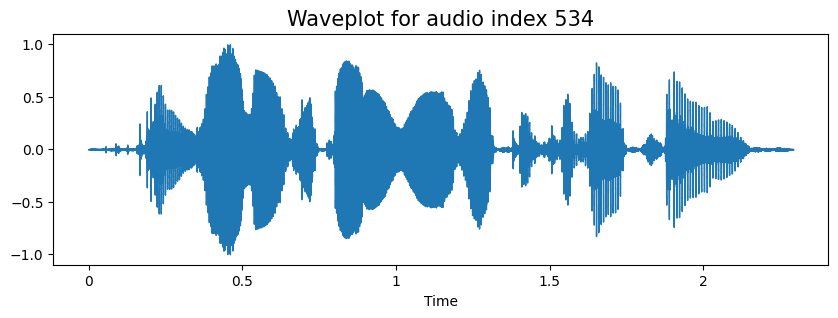

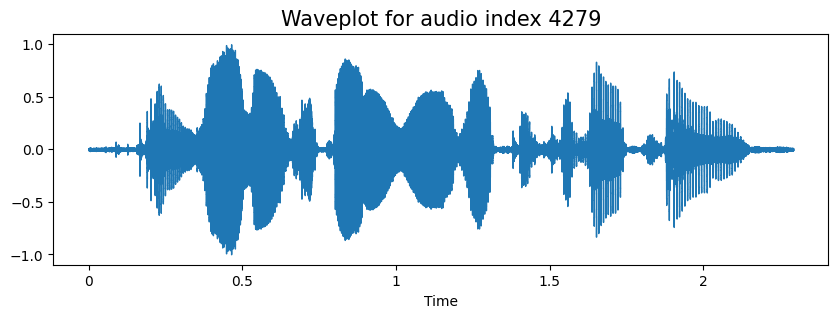

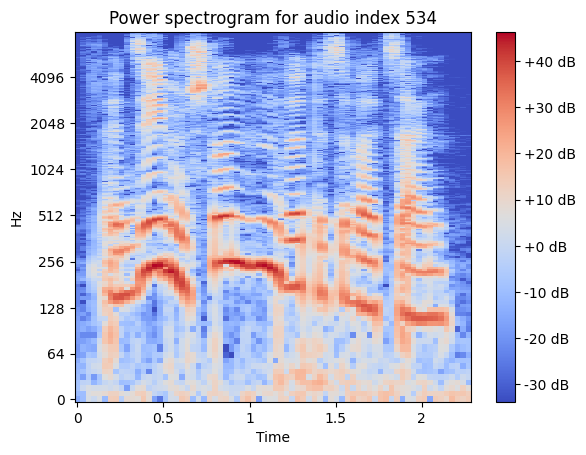

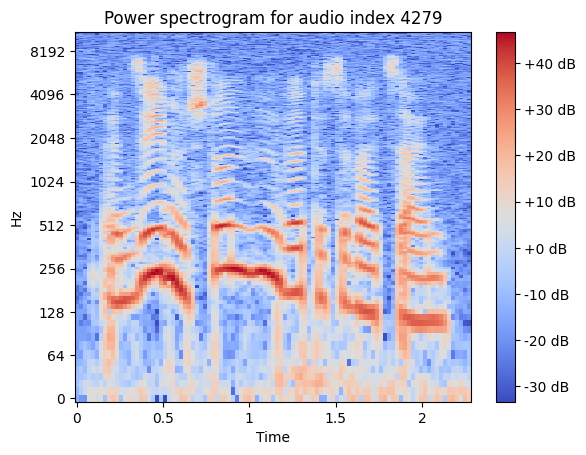

In [21]:
create_waveplot(df_combined_3, 534, 4279, 12)

In [23]:
pip install pyloudnorm

Dynamic Range Copmression

In [25]:
import pyloudnorm as pyln

# Function to apply dynamic range compression
def dynamic_range_compression(data, sr):
    meter = pyln.Meter(sr)
    loudness = meter.integrated_loudness(data)
    augmented_data = pyln.normalize.loudness(data, loudness, -23.0)
    return augmented_data

# Set an arbitrary sampling rate (SR)
sr = 22050

# List to store DRC-augmented file paths and labels
drc_data = []

# Apply dynamic range compression
for index, row in df.iterrows():
    file_path = row['file_path']
    label = row['label']
    # Load the original audio file
    y, original_sr = sf.read(file_path)
    # Resample if original_sr is different from sr
    if original_sr != sr:
        y = librosa.resample(y, orig_sr=original_sr, target_sr=sr)
    # Apply dynamic range compression
    y_drc = dynamic_range_compression(y, sr)

    # Create a new file name for the DRC-augmented audio
    new_file_path = file_path.replace(".wav", f"_drc_{i}.wav")
    # Save the DRC-augmented audio
    sf.write(new_file_path, y_drc, sr)
    # Append the new file path and label to the augmented list
    drc_data.append((new_file_path, label))

# Combine the original and augmented file labels
combined_file_labels = list(df_combined_3.itertuples(index=False, name=None)) + drc_data

# Create a DataFrame from the combined file paths and labels
df_combined_4 = pd.DataFrame(combined_file_labels, columns=['file_path', 'label'])

# Display the combined DataFrame
print(df_combined_4)

/usr/local/lib/python3.10/dist-packages/pyloudnorm/normalize.py:62: UserWarning: Possible clipped samples in output.
  warnings.warn("Possible clipped samples in output.")
/usr/local/lib/python3.10/dist-packages/pyloudnorm/normalize.py:62: UserWarning: Possible clipped samples in output.
  warnings.warn("Possible clipped samples in output.")


                               file_path  label
0           /root/Emo-DB/wav/14a05Na.wav      6
1           /root/Emo-DB/wav/03a01Nc.wav      6
2           /root/Emo-DB/wav/16b09Wb.wav      0
3           /root/Emo-DB/wav/11b03Wa.wav      0
4           /root/Emo-DB/wav/13a07Wb.wav      0
...                                  ...    ...
4810  /root/Emo-DB/wav/15a02Wb_drc_2.wav      0
4811  /root/Emo-DB/wav/16a07Ea_drc_2.wav      2
4812  /root/Emo-DB/wav/03b03Nb_drc_2.wav      6
4813  /root/Emo-DB/wav/14b10Ad_drc_2.wav      3
4814  /root/Emo-DB/wav/14a07Ld_drc_2.wav      1

[4815 rows x 2 columns]


The original file:
 File Path: /root/Emo-DB/wav/14a07Ld.wav 
 Label: 1 

Comparison file:
 File Path: /root/Emo-DB/wav/14a07Ld_drc_2.wav 
 Label: 1 

The three most recent files:
                                file_path  label
4803  /root/Emo-DB/wav/16b01Aa_drc_2.wav      3
4804  /root/Emo-DB/wav/08a07Ta_drc_2.wav      5
4805  /root/Emo-DB/wav/12b10Ld_drc_2.wav      1
4806  /root/Emo-DB/wav/15b09Ta_drc_2.wav      5
4807  /root/Emo-DB/wav/11b10Ad_drc_2.wav      3
4808  /root/Emo-DB/wav/09b09Nd_drc_2.wav      6
4809  /root/Emo-DB/wav/15b10Lc_drc_2.wav      1
4810  /root/Emo-DB/wav/15a02Wb_drc_2.wav      0
4811  /root/Emo-DB/wav/16a07Ea_drc_2.wav      2
4812  /root/Emo-DB/wav/03b03Nb_drc_2.wav      6
4813  /root/Emo-DB/wav/14b10Ad_drc_2.wav      3
4814  /root/Emo-DB/wav/14a07Ld_drc_2.wav      1 



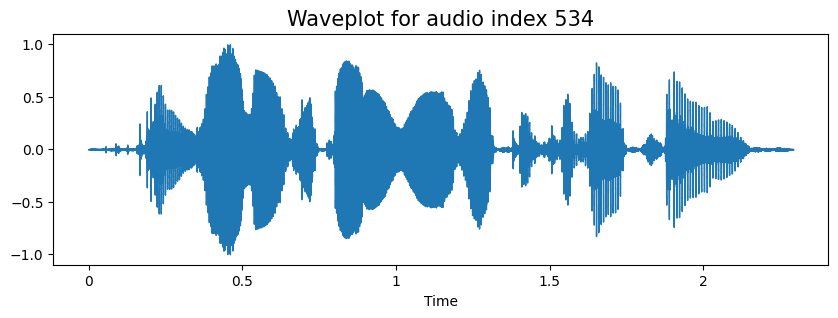

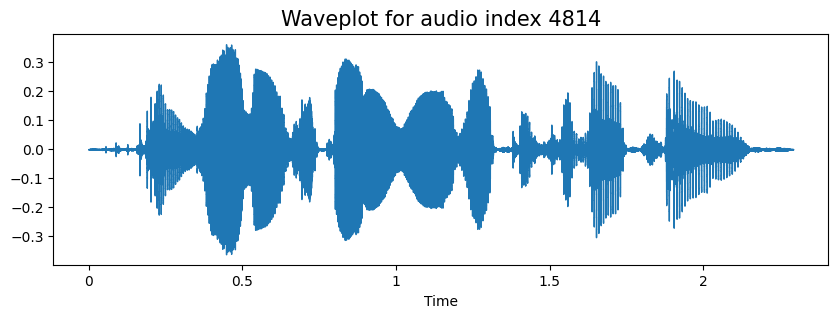

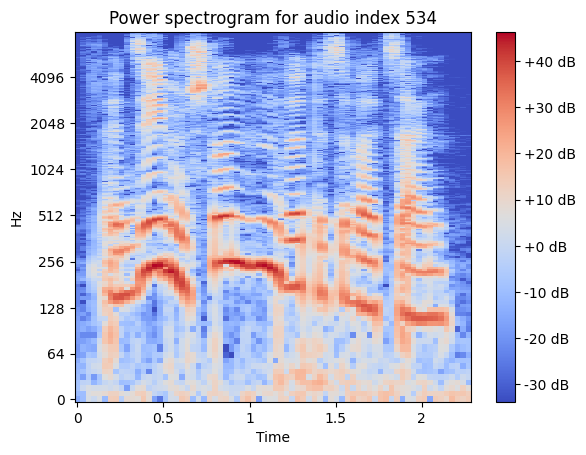

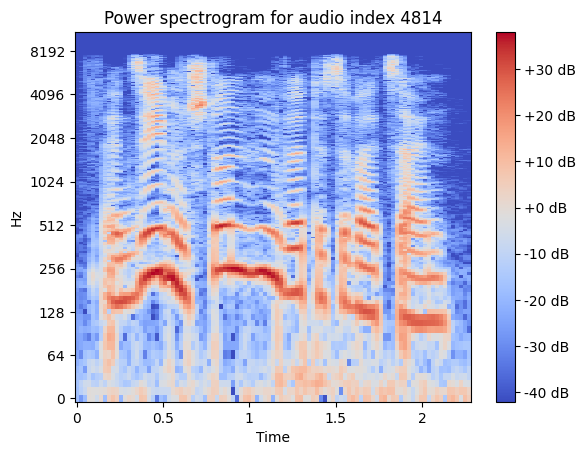

In [27]:
create_waveplot(df_combined_4, 534, 4814, 12)

# Spliting the data

In [74]:
from sklearn.model_selection import train_test_split

# First, split the data into a 70% training set and a 30% remaining set
train_df, temp_df = train_test_split(df_combined_2, test_size=0.30, random_state=42)

# Then, split the remaining 30% into 15% validation and 15% test sets
val_df, test_df = train_test_split(temp_df, test_size=0.50, random_state=42)

# Verify the sizes of the splits
print(f'Training set size: {train_df.shape[0]}')
print(f'Validation set size: {val_df.shape[0]}')
print(f'Test set size: {test_df.shape[0]}')

Training set size: 2621
Validation set size: 562
Test set size: 562


In [29]:
pip install noisereduce

# Data preperation

*   Creating the energy layer and MFCCs
*   Padding or Truncating data



In [32]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [75]:
import numpy as np
import librosa
import noisereduce as nr
import pandas as pd

# Function to convert audio to MFCCs and ensure a fixed shape
def audio_to_mfcc(file_path, sr=16000, n_mfcc=12, max_length=150, n_fft=512):
    y, sr = librosa.load(file_path, sr=sr)
    y = nr.reduce_noise(y=y, sr=sr)  # Apply noise reduction

    # Calculate energy
    energy = np.sum(y**2)

    # Extract MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft)
    mfccs = librosa.util.normalize(mfccs, axis=1)

    # Ensure max_length frames (pad with zeros or truncate)
    if mfccs.shape[1] < max_length:
        padding = max_length - mfccs.shape[1]
        mfccs = np.pad(mfccs, ((0, 0), (0, padding)), mode='constant')
    else:
        mfccs = mfccs[:, :max_length]

    # Add energy as the first row
    energy_row = np.full((1, max_length), energy)
    features = np.vstack((energy_row, mfccs))

    return features

# Example usage to process the entire dataset
def process_dataset(df, sr=16000, n_mfcc=12, max_length=150, n_fft=512):
    mfcc_data = []
    for index, row in df.iterrows():
        file_path = row['file_path']
        label = row['label']
        features = audio_to_mfcc(file_path, sr, n_mfcc, max_length, n_fft)
        mfcc_data.append({"features": features, "label": label})
    mfcc_df = pd.DataFrame(mfcc_data)
    return mfcc_df

# Process each dataset
train_mfcc_df = process_dataset(train_df, n_fft=400)
val_mfcc_df = process_dataset(val_df, n_fft=400)
test_mfcc_df = process_dataset(test_df, n_fft=400)

# Display the feature dataframes
print(train_mfcc_df.head())
print(val_mfcc_df.head())
print(test_mfcc_df.head())


                                            features  label
0  [[77.98821, 77.98821, 77.98821, 77.98821, 77.9...      5
1  [[58.25174, 58.25174, 58.25174, 58.25174, 58.2...      0
2  [[66.02727, 66.02727, 66.02727, 66.02727, 66.0...      0
3  [[150.61224, 150.61224, 150.61224, 150.61224, ...      5
4  [[46.08872, 46.08872, 46.08872, 46.08872, 46.0...      6
                                            features  label
0  [[82.27443, 82.27443, 82.27443, 82.27443, 82.2...      3
1  [[120.65514, 120.65514, 120.65514, 120.65514, ...      1
2  [[129.50558, 129.50558, 129.50558, 129.50558, ...      5
3  [[270.70157, 270.70157, 270.70157, 270.70157, ...      6
4  [[59.684917, 59.684917, 59.684917, 59.684917, ...      0
                                            features  label
0  [[123.335945, 123.335945, 123.335945, 123.3359...      6
1  [[117.73039, 117.73039, 117.73039, 117.73039, ...      2
2  [[84.49937, 84.49937, 84.49937, 84.49937, 84.4...      2
3  [[194.86057, 194.86057, 194.86057, 19

**Cheking the shape of one of the data**

In [76]:
train_mfcc_df['features'][1].shape

(13, 150)

# Extra
* saving and loading from colab to prevent data loss

In [36]:
import os
import pickle
from google.colab import drive

drive_base_dir = '/content/drive/MyDrive/AI-HW-4'

# Save the combined DataFrame to Google Drive using pickle
with open(os.path.join(drive_base_dir, 'train_mfcc_df.pkl'), 'wb') as f:
    pickle.dump(train_mfcc_df, f)

with open(os.path.join(drive_base_dir, 'val_mfcc_df.pkl'), 'wb') as f:
    pickle.dump(val_mfcc_df, f)

with open(os.path.join(drive_base_dir, 'test_mfcc_df.pkl'), 'wb') as f:
    pickle.dump(test_mfcc_df, f)


In [143]:
import pickle
# Load the DataFrame from Google Drive using pickle
with open('/content/drive/MyDrive/AI-HW-4/train_mfcc_df.pkl', 'rb') as f:
    train_mfcc = pickle.load(f)

with open('/content/drive/MyDrive/AI-HW-4/val_mfcc_df.pkl', 'rb') as f:
    val_mfcc = pickle.load(f)

with open('/content/drive/MyDrive/AI-HW-4/test_mfcc_df.pkl', 'rb') as f:
    test_mfcc = pickle.load(f)

# Check the shape of the features
print(train_mfcc['features'][1].shape)


(13, 150)


Checking all available emotions

In [43]:
def print_unique_values(df, column_name):
    unique_values = df[column_name].unique()
    print(f"Unique values in column '{column_name}':")
    for value in unique_values:
        print(value)

# Specify the column name
column_name = 'Column1'

# Call the function
print_unique_values(train_mfcc, 'label')

Unique values in column 'label':
1
3
0
2
4
6
5


# CNN models

**Splitting the emotion labels(y) from digitized-audio data(x).**

In [148]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Prepare the data
X_train = np.stack(train_mfcc['features'].values)
X_val = np.stack(val_mfcc['features'].values)
X_test = np.stack(test_mfcc['features'].values)

# Reshape to add the channel dimension
X_train = X_train[..., np.newaxis]
X_val = X_val[..., np.newaxis]
X_test = X_test[..., np.newaxis]


encoder = LabelEncoder()
y_train = encoder.fit_transform(train_mfcc['label'])
y_val = encoder.transform(val_mfcc['label'])
y_test = encoder.transform(test_mfcc['label'])

# Verify the shapes
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')


X_train shape: (3370, 13, 150, 1)
y_train shape: (3370,)


**Converting y_train and y_val to one-hot encoding for categorical_crossentropy**

In [150]:
y_train_cce = to_categorical(y_train, num_classes)
y_val_cce = to_categorical(y_val, num_classes)
y_test_cce = to_categorical(y_test, num_classes)

**Constructing the CNN model creator function**

In [151]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def create_cnn_model(input_shape, num_classes):
    model = Sequential()

    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model

input_shape = (13, 150, 1)  # MFCCs shape with a single channel
num_classes = 7  # Number of classes

model = create_cnn_model(input_shape, num_classes)

# Display the model summary
model.summary()


Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 11, 148, 32)       320       
                                                                 
 max_pooling2d_43 (MaxPooli  (None, 5, 74, 32)         0         
 ng2D)                                                           
                                                                 
 dropout_60 (Dropout)        (None, 5, 74, 32)         0         
                                                                 
 conv2d_46 (Conv2D)          (None, 3, 72, 64)         18496     
                                                                 
 max_pooling2d_44 (MaxPooli  (None, 1, 36, 64)         0         
 ng2D)                                                           
                                                                 
 dropout_61 (Dropout)        (None, 1, 36, 64)       

**CNN model with categorical_crossentropy loss function**

In [152]:
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Compile the model with categorical crossentropy
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history_cce = model.fit(X_train, y_train_cce, validation_data=(X_val, y_val_cce), epochs=50, batch_size=32, callbacks=[early_stopping])

Epoch 1/50
106/106 [==============================] - 2s 7ms/step - loss: 2.5313 - accuracy: 0.2101 - val_loss: 1.9308 - val_accuracy: 0.2382
Epoch 2/50
106/106 [==============================] - 1s 5ms/step - loss: 1.9295 - accuracy: 0.2442 - val_loss: 1.9257 - val_accuracy: 0.2382
Epoch 3/50
106/106 [==============================] - 1s 5ms/step - loss: 1.9221 - accuracy: 0.2448 - val_loss: 1.9178 - val_accuracy: 0.2382
Epoch 4/50
106/106 [==============================] - 1s 5ms/step - loss: 1.9163 - accuracy: 0.2448 - val_loss: 1.9038 - val_accuracy: 0.2382
Epoch 5/50
106/106 [==============================] - 1s 5ms/step - loss: 1.9112 - accuracy: 0.2457 - val_loss: 1.9085 - val_accuracy: 0.2382
Epoch 6/50
106/106 [==============================] - 1s 5ms/step - loss: 1.9082 - accuracy: 0.2442 - val_loss: 1.9063 - val_accuracy: 0.2382
Epoch 7/50
106/106 [==============================] - 1s 6ms/step - loss: 1.9049 - accuracy: 0.2448 - val_loss: 1.9044 - val_accuracy: 0.2382
Epoch 

**Accuracy and loss of the CNN model with categorical crossentropy loss function**

In [153]:
test_loss_cce, test_accuracy_cce = model.evaluate(X_test, y_test_cce, verbose=0)
print(f'Test Loss (CCE): {test_loss_cce:.4f}')
print(f'Test Accuracy (CCE): {test_accuracy_cce:.4f}')

Test Loss (CCE): 0.2038
Test Accuracy (CCE): 0.9433


In [87]:
!pip install tensorflow

**Reconstructing the CNN model to reset weights**

In [154]:
model_scce = create_cnn_model(input_shape, num_classes)
model_scce.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 11, 148, 32)       320       
                                                                 
 max_pooling2d_45 (MaxPooli  (None, 5, 74, 32)         0         
 ng2D)                                                           
                                                                 
 dropout_63 (Dropout)        (None, 5, 74, 32)         0         
                                                                 
 conv2d_48 (Conv2D)          (None, 3, 72, 64)         18496     
                                                                 
 max_pooling2d_46 (MaxPooli  (None, 1, 36, 64)         0         
 ng2D)                                                           
                                                                 
 dropout_64 (Dropout)        (None, 1, 36, 64)       

**CNN model with sparse categorical crossentropy loss function**

In [155]:
# Compile the model with sparse categorical crossentropy
model_scce.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with sparse categorical crossentropy
history_scce = model_scce.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, callbacks=[early_stopping])

Epoch 1/50
106/106 [==============================] - 2s 7ms/step - loss: 2.7020 - accuracy: 0.2261 - val_loss: 1.9023 - val_accuracy: 0.2382
Epoch 2/50
106/106 [==============================] - 1s 5ms/step - loss: 1.8484 - accuracy: 0.2475 - val_loss: 1.6615 - val_accuracy: 0.2396
Epoch 3/50
106/106 [==============================] - 1s 5ms/step - loss: 1.6473 - accuracy: 0.3211 - val_loss: 1.4305 - val_accuracy: 0.4571
Epoch 4/50
106/106 [==============================] - 1s 6ms/step - loss: 1.3767 - accuracy: 0.4380 - val_loss: 1.1331 - val_accuracy: 0.5623
Epoch 5/50
106/106 [==============================] - 1s 7ms/step - loss: 1.1953 - accuracy: 0.5282 - val_loss: 1.0074 - val_accuracy: 0.6357
Epoch 6/50
106/106 [==============================] - 1s 8ms/step - loss: 1.0909 - accuracy: 0.5715 - val_loss: 0.9451 - val_accuracy: 0.6316
Epoch 7/50
106/106 [==============================] - 1s 7ms/step - loss: 1.0016 - accuracy: 0.6053 - val_loss: 0.8299 - val_accuracy: 0.6731
Epoch 

**Accuracy of the CNN model with sparse categorical crossentropy loss function**

In [156]:
test_loss_scce, test_accuracy_scce = model_scce.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss (SCCE): {test_loss_scce:.4f}')
print(f'Test Accuracy (SCCE): {test_accuracy_scce:.4f}')

Test Loss (SCCE): 0.1993
Test Accuracy (SCCE): 0.9378


Plotting the Model Accuraccy and loss for both CNN models

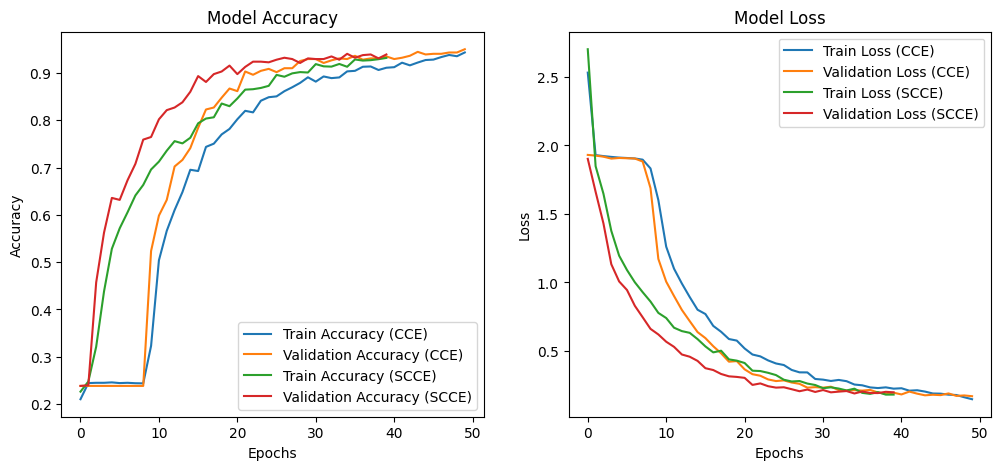

In [157]:
# Plot accuracy and loss for both loss functions
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_cce.history['accuracy'], label='Train Accuracy (CCE)')
plt.plot(history_cce.history['val_accuracy'], label='Validation Accuracy (CCE)')
plt.plot(history_scce.history['accuracy'], label='Train Accuracy (SCCE)')
plt.plot(history_scce.history['val_accuracy'], label='Validation Accuracy (SCCE)')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_cce.history['loss'], label='Train Loss (CCE)')
plt.plot(history_cce.history['val_loss'], label='Validation Loss (CCE)')
plt.plot(history_scce.history['loss'], label='Train Loss (SCCE)')
plt.plot(history_scce.history['val_loss'], label='Validation Loss (SCCE)')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [158]:
y_test.shape

(723,)

Plotting the confusion matrix for both CNN models

23/23 [==============================] - 0s 2ms/step


<Figure size 1000x1000 with 0 Axes>

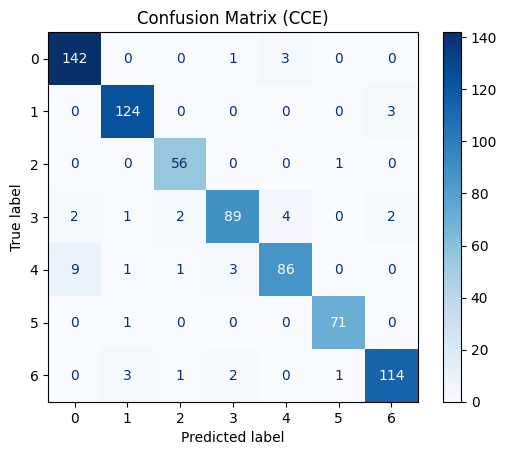

23/23 [==============================] - 0s 2ms/step


<Figure size 1000x1000 with 0 Axes>

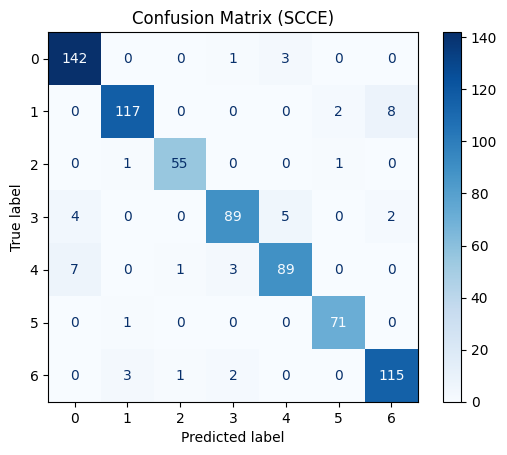

In [159]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict the test set with the model trained on categorical crossentropy
y_pred_cce = model.predict(X_test)
y_pred_classes_cce = np.argmax(y_pred_cce, axis=1)
y_test_labels = np.argmax(y_test_cce, axis=1)
# Compute confusion matrix for categorical crossentropy
cm_cce = confusion_matrix(y_test_labels, y_pred_classes_cce)
disp_cce = ConfusionMatrixDisplay(confusion_matrix=cm_cce, display_labels=encoder.classes_)

# Plot the confusion matrix for categorical crossentropy
plt.figure(figsize=(10, 10))
disp_cce.plot(cmap=plt.cm.Blues, values_format='g')
plt.title('Confusion Matrix (CCE)')
plt.show()

# Predict the test set with the model trained on sparse categorical crossentropy
y_pred_scce = model_scce.predict(X_test)
y_pred_classes_scce = np.argmax(y_pred_scce, axis=1)

# Compute confusion matrix for sparse categorical crossentropy
cm_scce = confusion_matrix(y_test, y_pred_classes_scce)
disp_scce = ConfusionMatrixDisplay(confusion_matrix=cm_scce, display_labels=encoder.classes_)

# Plot the confusion matrix for sparse categorical crossentropy
plt.figure(figsize=(10, 10))
disp_scce.plot(cmap=plt.cm.Blues, values_format='g')
plt.title('Confusion Matrix (SCCE)')
plt.show()


# LSTM-CNN models

In [96]:
from tensorflow.keras.layers import Reshape, TimeDistributed, LSTM

**Constructing the CNN-LSTM model creator function**

In [160]:
def create_cnn_lstm_model(input_shape, num_classes):
    model = Sequential()

    # TimeDistributed wrapper to apply a layer to every temporal slice of an input
    # Reshape to add the time steps dimension
    model.add(Reshape((1, input_shape[0], input_shape[1], input_shape[2]), input_shape=input_shape))
    model.add(TimeDistributed(Conv2D(32, kernel_size=(3, 3), activation='relu')))
    model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
    model.add(TimeDistributed(Dropout(0.25)))

    model.add(TimeDistributed(Conv2D(64, kernel_size=(3, 3), activation='relu')))
    model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
    model.add(TimeDistributed(Dropout(0.25)))

    # Flatten the outputs
    model.add(TimeDistributed(Flatten()))

    # Add LSTM layer
    model.add(LSTM(100))

    # Add Dense layers
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Adjust input shape to (time steps, height, width, channels)
input_shape = (13, 150, 1) # Original input shape
num_classes = 7  # Number of classes

model_cnn_lstm_cce = create_cnn_lstm_model(input_shape, num_classes)
model_cnn_lstm_cce.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_13 (Reshape)        (None, 1, 13, 150, 1)     0         
                                                                 
 time_distributed_70 (TimeD  (None, 1, 11, 148, 32)    320       
 istributed)                                                     
                                                                 
 time_distributed_71 (TimeD  (None, 1, 5, 74, 32)      0         
 istributed)                                                     
                                                                 
 time_distributed_72 (TimeD  (None, 1, 5, 74, 32)      0         
 istributed)                                                     
                                                                 
 time_distributed_73 (TimeD  (None, 1, 3, 72, 64)      18496     
 istributed)                                         

**CNN-LSTM model with categorical crossentropy loss function**

In [161]:
# Compile the model with categorical crossentropy
model_cnn_lstm_cce.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# Train the model with categorical crossentropy
history_cnn_lstm_cce = model_cnn_lstm_cce.fit(X_train, y_train_cce, validation_data=(X_val, y_val_cce), epochs=50, batch_size=32, callbacks=[early_stopping])

Epoch 1/50
106/106 [==============================] - 5s 17ms/step - loss: 1.9320 - accuracy: 0.2264 - val_loss: 1.9068 - val_accuracy: 0.2382
Epoch 2/50
106/106 [==============================] - 1s 10ms/step - loss: 1.9173 - accuracy: 0.2430 - val_loss: 1.9048 - val_accuracy: 0.2382
Epoch 3/50
106/106 [==============================] - 1s 7ms/step - loss: 1.9107 - accuracy: 0.2439 - val_loss: 1.8995 - val_accuracy: 0.2382
Epoch 4/50
106/106 [==============================] - 1s 7ms/step - loss: 1.9072 - accuracy: 0.2451 - val_loss: 1.9039 - val_accuracy: 0.2382
Epoch 5/50
106/106 [==============================] - 1s 7ms/step - loss: 1.8991 - accuracy: 0.2451 - val_loss: 1.7981 - val_accuracy: 0.2258
Epoch 6/50
106/106 [==============================] - 1s 7ms/step - loss: 1.5150 - accuracy: 0.3905 - val_loss: 1.1255 - val_accuracy: 0.5679
Epoch 7/50
106/106 [==============================] - 1s 6ms/step - loss: 1.1177 - accuracy: 0.5703 - val_loss: 0.9116 - val_accuracy: 0.6150
Epoc

**Accuracy and loss of the CNN-LSTM model with categorical crossentropy loss function**

In [162]:
test_loss_cnn_lstm_cce, test_accuracy_cnn_lstm_cce = model_cnn_lstm_cce.evaluate(X_test, to_categorical(y_test, num_classes=7), verbose=0)
print(f'Test Loss (CCE): {test_loss_cnn_lstm_cce:.4f}')
print(f'Test Accuracy (CCE): {test_accuracy_cnn_lstm_cce:.4f}')

Test Loss (CCE): 0.2795
Test Accuracy (CCE): 0.9364


**Reconstructing the CNN-LSTM model to reset weights**

In [163]:
model_cnn_lstm_scce = create_cnn_lstm_model(input_shape, num_classes)
model_cnn_lstm_scce.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_14 (Reshape)        (None, 1, 13, 150, 1)     0         
                                                                 
 time_distributed_77 (TimeD  (None, 1, 11, 148, 32)    320       
 istributed)                                                     
                                                                 
 time_distributed_78 (TimeD  (None, 1, 5, 74, 32)      0         
 istributed)                                                     
                                                                 
 time_distributed_79 (TimeD  (None, 1, 5, 74, 32)      0         
 istributed)                                                     
                                                                 
 time_distributed_80 (TimeD  (None, 1, 3, 72, 64)      18496     
 istributed)                                         

**CNN-LSTM model with sparse categorical crossentropy loss function**

In [164]:
# Compile the model with sparse categorical crossentropy
model_cnn_lstm_scce.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with sparse categorical crossentropy
history_cnn_lstm_scce = model_cnn_lstm_scce.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, callbacks=[early_stopping])

Epoch 1/50
106/106 [==============================] - 4s 11ms/step - loss: 1.9305 - accuracy: 0.2312 - val_loss: 1.8975 - val_accuracy: 0.2382
Epoch 2/50
106/106 [==============================] - 1s 6ms/step - loss: 1.8290 - accuracy: 0.2715 - val_loss: 1.5134 - val_accuracy: 0.3740
Epoch 3/50
106/106 [==============================] - 1s 6ms/step - loss: 1.2955 - accuracy: 0.4855 - val_loss: 1.0494 - val_accuracy: 0.5859
Epoch 4/50
106/106 [==============================] - 1s 7ms/step - loss: 0.9961 - accuracy: 0.6181 - val_loss: 0.8241 - val_accuracy: 0.6717
Epoch 5/50
106/106 [==============================] - 1s 9ms/step - loss: 0.8113 - accuracy: 0.6938 - val_loss: 0.6694 - val_accuracy: 0.7548
Epoch 6/50
106/106 [==============================] - 1s 9ms/step - loss: 0.6299 - accuracy: 0.7685 - val_loss: 0.5913 - val_accuracy: 0.7909
Epoch 7/50
106/106 [==============================] - 1s 9ms/step - loss: 0.5280 - accuracy: 0.8119 - val_loss: 0.5057 - val_accuracy: 0.8255
Epoch

**Accuracy of the CNN-LSTM model with sparse categorical crossentropy loss function**

In [165]:
test_loss_cnn_lstm_scce, test_accuracy_cnn_lstm_cce = model_cnn_lstm_scce.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss (SCCE): {test_loss_cnn_lstm_scce:.4f}')
print(f'Test Accuracy (SCCE): {test_accuracy_cnn_lstm_cce:.4f}')

Test Loss (SCCE): 0.2782
Test Accuracy (SCCE): 0.9295


Plotting the confusion matrix for both CNN-LSTM models

23/23 [==============================] - 0s 3ms/step


<Figure size 1000x1000 with 0 Axes>

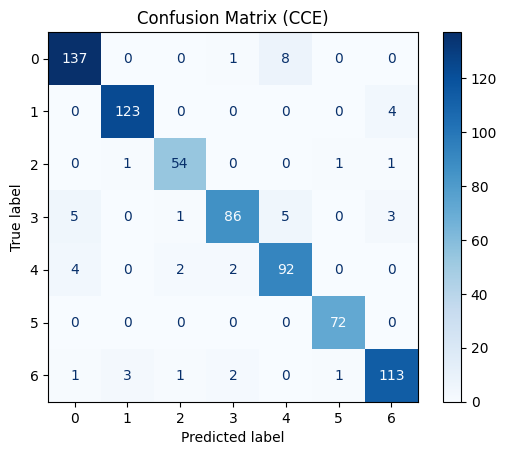

23/23 [==============================] - 0s 3ms/step


<Figure size 1000x1000 with 0 Axes>

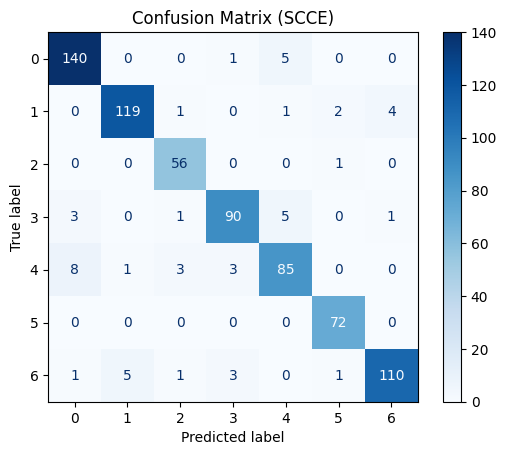

In [166]:
# Predict the test set with the model trained on categorical crossentropy
y_pred_cce = model_cnn_lstm_cce.predict(X_test)
y_pred_classes_cce = np.argmax(y_pred_cce, axis=1)
y_test_labels = np.argmax(y_test_cce, axis=1)
# Compute confusion matrix for categorical crossentropy
cm_cce = confusion_matrix(y_test_labels, y_pred_classes_cce)
disp_cce = ConfusionMatrixDisplay(confusion_matrix=cm_cce, display_labels=encoder.classes_)

# Plot the confusion matrix for categorical crossentropy
plt.figure(figsize=(10, 10))
disp_cce.plot(cmap=plt.cm.Blues, values_format='g')
plt.title('Confusion Matrix (CCE)')
plt.show()

# Predict the test set with the model trained on sparse categorical crossentropy
y_pred_scce = model_cnn_lstm_scce.predict(X_test)
y_pred_classes_scce = np.argmax(y_pred_scce, axis=1)

# Compute confusion matrix for sparse categorical crossentropy
cm_scce = confusion_matrix(y_test, y_pred_classes_scce)
disp_scce = ConfusionMatrixDisplay(confusion_matrix=cm_scce, display_labels=encoder.classes_)

# Plot the confusion matrix for sparse categorical crossentropy
plt.figure(figsize=(10, 10))
disp_scce.plot(cmap=plt.cm.Blues, values_format='g')
plt.title('Confusion Matrix (SCCE)')
plt.show()
